In [1]:
import nltk
import datetime
from nltk.corpus import brown
from nltk.tokenize import sent_tokenize, word_tokenize

__1.__ Search the web for "spoof newspaper headlines", to find such gems as: _British Left Waffles on Falkland Islands, and Juvenile Court to Try Shooting Defendant_. <br> Manually tag these headlines to see if knowledge of the part-of-speech tags removes the ambiguity.

In [2]:
headline = "British Left Waffles on Falkland Islands, and Juvenile Court to Try Shooting Defendant"

In [3]:
def pos_tag(text):
    word = word_tokenize(text)
    return nltk.pos_tag(word)

In [4]:
pos_tag(headline)

[('British', 'JJ'),
 ('Left', 'NNP'),
 ('Waffles', 'NNP'),
 ('on', 'IN'),
 ('Falkland', 'NNP'),
 ('Islands', 'NNP'),
 (',', ','),
 ('and', 'CC'),
 ('Juvenile', 'NNP'),
 ('Court', 'NNP'),
 ('to', 'TO'),
 ('Try', 'VB'),
 ('Shooting', 'NNP'),
 ('Defendant', 'NNP')]

3. Tokenize and tag the following sentence: _They wind back the clock, while we chase after the wind_. What different pronunciations and parts of speech are involved?

In [5]:
pos_tag("They wind back the clock, while we chase after the wind.")

[('They', 'PRP'),
 ('wind', 'VBP'),
 ('back', 'RB'),
 ('the', 'DT'),
 ('clock', 'NN'),
 (',', ','),
 ('while', 'IN'),
 ('we', 'PRP'),
 ('chase', 'VBP'),
 ('after', 'IN'),
 ('the', 'DT'),
 ('wind', 'NN'),
 ('.', '.')]

__4. Review the mappings in 3.1. Discuss any other examples of mappings you can think of. What type of information do they map from and to?__

__5. Using the Python interpreter in interactive mode, experiment with the dictionary examples in this chapter. Create a dictionary  `d` , and add some entries. What happens if you try to access a non-existent entry, e.g.  `d['xyz']` ?__

In [7]:
#d={}
#d['xyz']

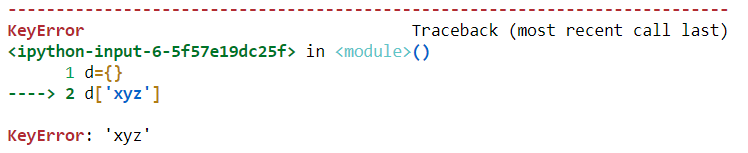

__6. Try deleting an element from a dictionary `d`, using the syntax  `del d['abc']` . Check that the item was deleted.__

In [8]:
d={'abd':15,'abc':10,'eds':100}

In [9]:
del d['abc']
d

{'abd': 15, 'eds': 100}

__7. Create two dictionaries, `d1` and `d2`, and add some entries to each. Now issue the command `d1.update(d2)`. What did this do? What might it be useful for?__

In [11]:
d1 = {'andy':15,'eric':34,'joy':25,'sherry':27}
d2 = {'acer':50, 'asus':30, 'auo':40, 'taiwan':108}

In [12]:
d1.update(d2)

Update the dictionary with the key/value pairs from other, overwriting existing keys.
Useful when merging two dictionaries.

__10. Train a unigram tagger and run it on some new text. Observe that some words are not assigned a tag. Why not?__

In [14]:
brown_tagged_sents = brown.tagged_sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)

test_text = ['hello', 'world', 'natural', 'language', 'processing','i','am','happy']
unigram_tagger.tag(test_text)

[('hello', None),
 ('world', 'NN'),
 ('natural', 'JJ'),
 ('language', 'NN'),
 ('processing', 'NN'),
 ('i', None),
 ('am', 'BEM'),
 ('happy', 'JJ')]

單字沒有出現在training set過

__11. Learn about the affix tagger (type `help(nltk.AffixTagger)` ). Train an affix tagger and run it on some new text. Experiment with different settings for the affix length and the minimum word length. Discuss your findings.__

In [14]:
#help(nltk.AffixTagger)

In [15]:
def affix_tagger_(affix_len, min_stem_len, text):
    affix_tagger = nltk.AffixTagger(brown_tagged_sents, affix_length=affix_len, min_stem_length=min_stem_len)
    test_text = text.split()
    return affix_tagger.tag(test_text)

In [16]:
affix_tagger = nltk.AffixTagger(brown_tagged_sents, affix_length=3, min_stem_length=0)
#min_stem_length: 字數<min_stem_length+abs(affix_len)會被assign None
#affix_length: 在訓練和標記期間應考慮的詞綴長度。 使用負數表示後綴。
test_text = nltk.word_tokenize('I love this mouse for the price it is.')
affix_tagger.tag(test_text)

[('I', None),
 ('love', 'VB'),
 ('this', 'DT'),
 ('mouse', 'NN'),
 ('for', 'IN'),
 ('the', 'AT'),
 ('price', 'NN'),
 ('it', None),
 ('is', None),
 ('.', None)]

__12.Train a bigram tagger with no backoff tagger, and run it on some of the training data. Next, run it on some new data. What happens to the performance of the tagger? Why?__

In [17]:
bigram_tagger = nltk.BigramTagger(brown_tagged_sents)
bigram_tagger

<BigramTagger: size=33701>

In [18]:
bigram_tagger.tag(brown.sents()[1])[-10:]

[('for', None),
 ('the', None),
 ('manner', None),
 ('in', None),
 ('which', None),
 ('the', None),
 ('election', None),
 ('was', None),
 ('conducted', None),
 ('.', None)]

In [19]:
bigram_tagger.tag(nltk.word_tokenize('For those who stream their gaming online, equipment matters. And when getting a keyboard for someone who games regularly can be a little intimidating, especially if you yourself are not a gamer. So when I gave this keyboard to my son to try out, I did so with some trepidation. What would he think? Would he be pleased or immediately switch back to his old keyboard?'))[:8]

[('For', 'IN'),
 ('those', 'DTS'),
 ('who', 'WPS'),
 ('stream', None),
 ('their', None),
 ('gaming', None),
 ('online', None),
 (',', None)]

In [19]:
# 沒看過得資料就會被標註成None, 一旦一個字變成None, 後面的字也會都是None(因為bigram沒有遇過都是none

__13.  We can use a dictionary to specify the values to be substituted into a formatting string. Read Python's library documentation for formatting strings http://docs.python.org/lib/typesseq-strings.html (_404 NOT FOUND_) and use this method to display today's date in two different formats.__

In [21]:
datetime.datetime.today().strftime("%Y-%m-%d")

'2019-04-10'

__14. Use `sorted()` and `set()` to get a sorted list of tags used in the Brown corpus, removing duplicates.__

In [20]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [21]:
tags = sorted(set([tag for (_, tag) in nltk.corpus.brown.tagged_words()]))

In [22]:
len(tags)

472

__15. Write programs to process the Brown Corpus and find answers to the following questions:__
- 1. Which nouns are more common in their plural form, rather than their singular form? (Only consider regular plurals, formed with the -s suffix.)

In [23]:
brown_tagged = brown.tagged_words()
cfd = nltk.ConditionalFreqDist(brown_tagged)

In [24]:
from collections import defaultdict
common_plural = set()
single_num = defaultdict(int)
plural_num = defaultdict(int)
for word in set(brown.words()):
    if cfd[word+'s']['NNS'] > cfd[word]['NN']:
        single_num[word] = cfd[word]['NN']
        plural_num[word+'s'] = cfd[word+'s']['NNS']
        common_plural.add(word)
    elif cfd[word+'s']['NNPS'] > cfd[word]['NNP']:
        single_num[word] = cfd[word]['NNP']
        plural_num[word+'s'] = cfd[word+'s']['NNPS']
        common_plural.add(word)

In [30]:
plural_num.keys()

dict_keys(['Hurts', 'scholastics', 'movies', 'Pilots', 'landmarks', 'buyers', 'inmates', 'obligations', 'piers', 'guests', 'compliments', 'commoners', 'Courses', 'colleagues', 'interrelationships', '1890s', 'Returns', 'innocents', 'rays', '1920s', 'absolutes', 'nuts', 'liberties', 'spoils', 'employes', 'additives', 'commitments', 'endowments', 'sailboats', 'whites', 'passengers', '45-degrees', 'theatricals', 'listeners', 'communes', 'pickers', 'disadvantages', 'Nations', 'others', 'yachts', 'sensors', 'eatables', 'straps', 'Colors', 'concessions', 'toppings', 'thirds', 'controllers', 'Poets', 'francs', 'trustees', 'batteries', 'abolitionists', 'barriers', 'specifics', 'toes', 'newlyweds', 'slacks', 'imports', 'measurements', 'paws', 'Sets', 'proceedings', 'fives', 'motorists', 'Tests', 'pupils', 'adherents', 'brothels', 'farmers', 'chores', 'boots', 'Changes', 'giggles', 'expectations', 'consequences', 'sales', 'Attorneys', 'emotions', 'wavelengths', 'scenics', 'wrestles', 'Flocks', 'B

- 2. Which word has the greatest number of distinct tags. What are they, and what do they represent?

In [31]:
tag_dict = { k: len(cfd[k]) for k in cfd}

In [32]:
greatest = max(tag_dict, key=lambda key: tag_dict[key])

In [33]:
[(key, cfd[key]) for (key, value) in tag_dict.items() if value==12]

[('that',
  FreqDist({'CS': 6419, 'DT': 1975, 'WPS': 1638, 'WPO': 135, 'QL': 54, 'DT-NC': 6, 'WPS-NC': 3, 'CS-NC': 2, 'WPS-HL': 2, 'CS-HL': 1, ...}))]

The most frequent word is that with tags (taken from http://www.comp.leeds.ac.uk/amalgam/tagsets/brown.html )

- CS=conjunction, subordinating
- WPS=WH-pronoun, nominative
- DT=determiner/pronoun, singular
- QL=qualifier, pre
- WPO=WH-pronoun, accusative
- CS-HL=conjunction, subordinating (not in list)
- DT-NC=determiner/pronoun, singular (not in list)
- NIL=? (not in list)
- WPS-NC=WH-pronoun, nominative (not in list)
- WPO-NC=WH-pronoun, accusative (not in list)
- CS-NC=conjunction, subordinating (not in list)
- WPS-HL=WH-pronoun, nominative (not in list)

- 3. List tags in order of decreasing frequency. What do the 20 most frequent tags represent?

In [34]:
counts = defaultdict(int)
for (word, tag) in brown_tagged:
    counts[tag] += 1

In [35]:
from operator import itemgetter
sorted(counts.items(), key=itemgetter(1), reverse=True)[:20]

[('NN', 152470),
 ('IN', 120557),
 ('AT', 97959),
 ('JJ', 64028),
 ('.', 60638),
 (',', 58156),
 ('NNS', 55110),
 ('CC', 37718),
 ('RB', 36464),
 ('NP', 34476),
 ('VB', 33693),
 ('VBN', 29186),
 ('VBD', 26167),
 ('CS', 22143),
 ('PPS', 18253),
 ('VBG', 17893),
 ('PP$', 16872),
 ('TO', 14918),
 ('PPSS', 13802),
 ('CD', 13510)]

- 4. Which tags are nouns most commonly found after? What do these tags represent?

In [36]:
## find the word after
def after_word(all_word):
    second_word = [b[1] for (a, b) in nltk.bigrams(all_word) if a[1].startswith('NN')]
    fd = nltk.FreqDist(second_word)
    return [tag for (tag,_) in fd.most_common(10)]

In [37]:
after_word(brown_tagged)

['IN', '.', ',', 'CC', 'NN', 'NNS', 'VBD', 'CS', 'MD', 'BEZ']

__16. Explore the following issues that arise in connection with the lookup tagger: __<p>
- a. What happens to the tagger performance for the various model sizes when a backoff tagger is omitted?
> 忽略backoff時，字數越多，performance會越好，因為看過的字越多

- b. Consider the curve in 4.2; suggest a good size for a lookup tagger that balances memory and performance. Can you come up with scenarios where it would be preferable to minimize memory usage, or to maximize performance with no regard for memory usage?
> If possible, maximize performance with no regard for memory usage would be good but it'll also take times to training.

__17. What is the upper limit of performance for a lookup tagger, assuming no limit to the size of its table? (Hint: write a program to work out what percentage of tokens of a word are assigned the most likely tag for that word, on average.)__

> cannot sure about the meaning

__18. Generate some statistics for tagged data to answer the following questions: __<p>
- a. What proportion of word types are always assigned the same part-of-speech tag?

In [36]:
brown_tag = brown.tagged_words(tagset='universal')
cfd = nltk.ConditionalFreqDist(brown_tag)

In [53]:
print("{:.2f} %".format(len([cfd[word] for word in cfd if len(cfd[word])==1])/len(cfd)*100))

93.59 %


- b. How many words are ambiguous, in the sense that they appear with at least two tags?

In [54]:
print("{:.2f} %".format(len([cfd[word] for word in cfd if len(cfd[word])>=2])/len(cfd)*100))

6.41 %


- c. What percentage of word tokens in the Brown Corpus involve these ambiguous words?

In [65]:
len(([word for word in cfd if len(cfd[word])>=2]))/len(cfd)*100

6.414899120538024

__19. The evaluate() method works out how accurately the tagger performs on this text. <p>
For example, if the supplied tagged text was `[('the', 'DT'), ('dog', 'NN')]` and the tagger produced the output `[('the', 'NN'), ('dog', 'NN')]`, then the score would be 0.5.<p>Let's try to figure out how the evaluation method works: __

- a. A tagger `t` takes a list of words as input, and produces a list of tagged words as output. However, `t.evaluate()` is given correctly tagged text as its only parameter. What must it do with this input before performing the tagging?

> If you want a correct accuracy, you should split input into training set and test set. And tokenize all sentences you want to input.

- b. Once the tagger has created newly tagged text, how might the `evaluate()` method go about comparing it with the original tagged text and computing the accuracy score?

> accuracy score: $$\frac{number \ of \ right - number \ of \ wrong}{number \ of \ words}$$

- c. Now examine the source code to see how the method is implemented. Inspect `nltk.tag.api.__file__` to discover the location of the source code, and open this file using an editor (be sure to use the `api.py` file and not the compiled `api.pyc` binary file).

> https://www.nltk.org/_modules/nltk/tag/api.html

__20. Write code to search the Brown Corpus for particular words and phrases according to tags, to answer the following questions: __<p>
- a. Produce an alphabetically sorted list of the distinct words tagged as `MD`.

In [38]:
brown_tagged = brown.tagged_words()
cfd = nltk.ConditionalFreqDist(brown_tagged)

In [79]:
sorted(set([word for (word, tag) in brown_tagged if tag == 'MD']))[30:50]

['will', 'wilt', 'wod', 'wold', 'wolde', 'would']

- b. Identify words that can be plural nouns or third person singular verbs _(e.g. deals, flies)_.

In [48]:
vbs = [] #append verb which can be third person singular verbs
nns = [] #append noun which can be plural nouns
for word, tag in brown_tagged:
    if tag == 'VB':
        if cfd[word+'s'] and cfd[word+'s']['VBZ']:
            vbs.append(word.lower())
        elif cfd[word+'es'] and cfd[word+'es']['VBZ']:
            vbs.append(word.lower())
    elif tag == 'NN':
        if cfd[word+'s'] and cfd[word+'s']['NNS']:
            nns.append(word.lower())
        elif cfd[word+'es'] and cfd[word+'es']['NNS']:
            nns.append(word.lower())

In [77]:
sorted(set(vbs))[:10]

['abide',
 'abound',
 'absorb',
 'accentuate',
 'accept',
 'accommodate',
 'accomplish',
 'accord',
 'account',
 'accumulate']

In [78]:
sorted(set(nns))[-10:]

['yearning',
 'yeast',
 'yelp',
 'yield',
 'yokel',
 'youngster',
 'youth',
 'zero',
 'zombie',
 'zone']

- c. Identify three-word prepositional phrases of the form `IN + DET + NN` (eg. _in the lab_).

In [57]:
def find_3_word(sentence):
    for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence):
        if (t1=='IN' and t2 == 'DT' and t3.startswith('NN')):
            print(w1, w2, w3)

In [58]:
for s in brown_tagged_sents:
    find_3_word(s)

of this city
of this money
in each county
in this county
on this question
in this case
of that court
of this court
on each worker
on that date
for each illness
for each $1,500
for another setback
on this score
from another direction
over this problem
in this field
in this matter
into this campaign
into this state
at this time
in this campaign
from this year's
along this thoroughfare
Along this avenue
of this country's
for each joint
during that time
with this challenge
In this light
of this hour
with each start
during each practice
by that time
for this city
during another Open
of that stroke
on that milestone
of each month
For that matter
for this group
of that country
from this pair
of this column
at this point
of this phase
of this phase
in this class
in each area
In another attack
at this week's
within that span
of each month
in this conspiracy
for another year
of each month
of this program
at that time
of this state
of this danger
of this year
On that date
in this area
by this aut

- d. What is the ratio of masculine to feminine pronouns? (he/she)

In [65]:
len([w for (w,t) in brown_tagged if w.lower()=='he']) / len([w for (w,t) in brown_tagged if w.lower()=='she'])

3.3384615384615386